## Constructing a semantic space from the WCS CIELAB data

### Load file as a csv

In [27]:
import pandas as pd
fn = "cnum-vhcm-lab-new.txt"
data = pd.read_csv(fn, sep="\t")
data

,#cnum,V,H,C,MunH,MunV,L*,a*,b*
0,141,A,0,0,10.00RP,9.5,96.00,-0.06,0.06
1,274,B,0,0,10.00RP,9.0,91.08,-0.05,0.06
2,129,B,1,2,2.50R,9.0,91.08,5.53,2.22
3,230,B,2,2,5.00R,9.0,91.08,5.51,3.28
4,302,B,3,2,7.50R,9.0,91.08,5.54,4.46
...,...,...,...,...,...,...,...,...,...
325,305,I,37,8,2.50RP,2.0,20.54,34.44,-14.69
326,267,I,38,8,5.00RP,2.0,20.54,35.44,-10.40
327,243,I,39,8,7.50RP,2.0,20.54,35.97,-6.33
328,182,I,40,8,10.00RP,2.0,20.54,36.42,-2.08


In [28]:
# order by chip number, just for fun
data = data.sort_values(by="#cnum")
data

,#cnum,V,H,C,MunH,MunV,L*,a*,b*
153,1,E,29,10,2.50PB,6.0,61.70,-4.52,-39.18
65,2,C,23,4,7.50BG,8.0,81.35,-19.64,-4.30
169,3,F,4,16,10.00R,5.0,51.57,55.20,68.32
324,4,I,36,6,10.00P,2.0,20.54,24.14,-14.33
62,5,C,20,6,10.00G,8.0,81.35,-33.04,4.96
...,...,...,...,...,...,...,...,...,...
92,326,D,9,12,2.50Y,7.0,71.60,6.22,81.95
26,327,B,25,2,2.50B,9.0,91.08,-7.96,-4.41
263,328,H,16,6,10.00GY,3.0,30.77,-27.26,20.69
213,329,G,7,8,7.50YR,4.0,41.22,17.04,45.95


### Visualize first two dimensions

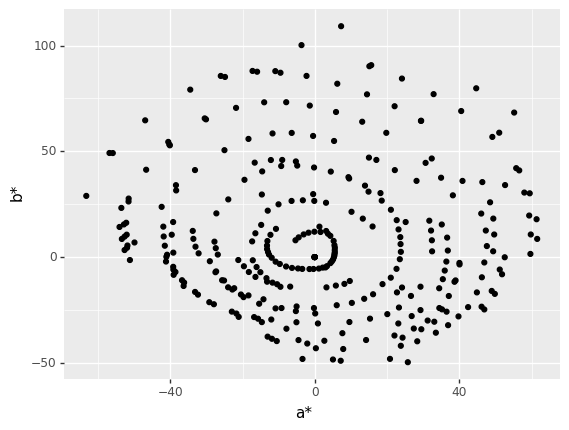

<ggplot: (342224506)>

In [29]:
import plotnine as pn

(
    pn.ggplot(data, pn.aes(x="a*", y="b*"))
    + pn.geom_point()
)

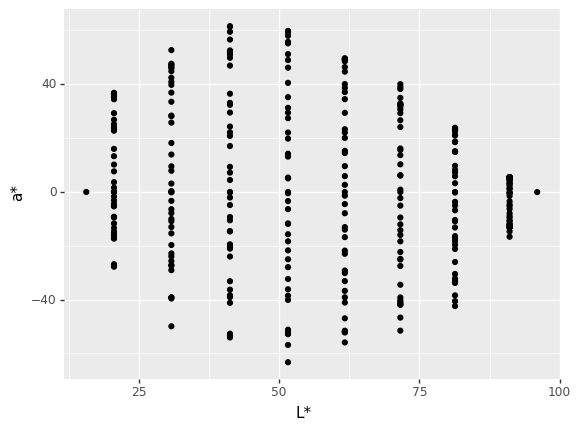

<ggplot: (343584642)>

In [30]:
(
    pn.ggplot(data, pn.aes(x="L*", y="a*"))
    + pn.geom_point()
)

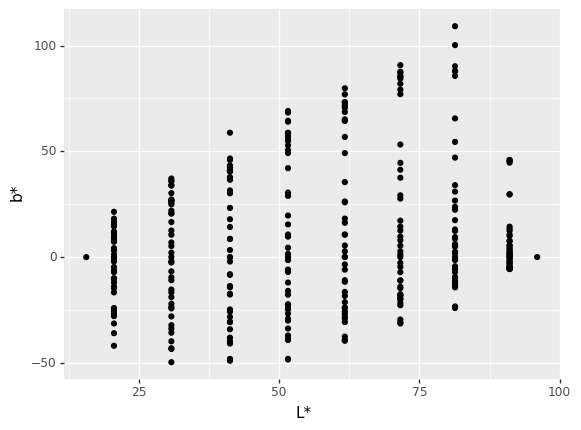

<ggplot: (341997572)>

In [31]:
(
    pn.ggplot(data, pn.aes(x="L*", y="b*"))
    + pn.geom_point()
)

### Inspect the list of triples that would comprise the semantic space

In [32]:
points = data[["L*","a*","b*"]].to_numpy()
[tuple(item) for item in points.tolist()]

[(61.7, -4.52, -39.18),
 (81.35, -19.64, -4.3),
 (51.57, 55.2, 68.32),
 (20.54, 24.14, -14.33),
 (81.35, -33.04, 4.96),
 (81.35, 14.87, 30.96),
 (61.7, -46.97, 64.65),
 (30.77, 47.63, 5.24),
 (41.22, 22.15, 41.13),
 (20.54, 7.63, -35.92),
 (20.54, -16.13, -4.67),
 (81.35, -10.94, 87.9),
 (20.54, -27.79, 7.33),
 (20.54, -9.52, -13.99),
 (81.35, 18.74, -12.74),
 (81.35, -0.05, 0.06),
 (61.7, 46.38, 35.47),
 (20.54, -1.74, 11.57),
 (61.7, -16.81, -28.31),
 (51.57, -56.86, 49.22),
 (61.7, 49.38, 2.78),
 (91.08, -5.25, 45.24),
 (51.57, 31.24, -29.94),
 (30.77, -0.15, 26.58),
 (41.22, -24.01, -14.24),
 (30.77, 7.86, -43.39),
 (91.08, 5.21, 7.67),
 (61.7, 40.07, -3.44),
 (71.6, -41.95, 14.43),
 (51.57, 29.45, 64.44),
 (81.35, -18.27, -7.01),
 (61.7, 37.1, -18.34),
 (71.6, -40.28, 53.23),
 (51.57, -11.88, -38.56),
 (71.6, 38.22, 29.22),
 (20.54, -26.87, 1.22),
 (61.7, 2.64, -39.49),
 (41.22, 52.58, -0.05),
 (41.22, -38.39, 31.53),
 (61.7, -29.22, -21.27),
 (30.77, 52.68, 34.06),
 (61.7, -1.4, 

### Save a minimal csv file with the referents

In [56]:
referents = data[["L*", "a*", "b*"]].rename(columns={name:name[0] for name in ["L*", "a*", "b*"]})
referents["name"] = data["#cnum"]
referents = referents.reset_index(drop=True)
referents

,L,a,b,name
0,61.70,-4.52,-39.18,1
1,81.35,-19.64,-4.30,2
2,51.57,55.20,68.32,3
3,20.54,24.14,-14.33,4
4,81.35,-33.04,4.96,5
...,...,...,...,...
325,71.60,6.22,81.95,326
326,91.08,-7.96,-4.41,327
327,30.77,-27.26,20.69,328
328,41.22,17.04,45.95,329


In [57]:
prior = referents[["name"]]
prior["probability"] = 1/330
prior

/var/folders/3z/q1pyp9n929z2nh_1_69s7y_40000gn/T/ipykernel_87662/398396745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,name,probability
0,1,0.00303
1,2,0.00303
2,3,0.00303
3,4,0.00303
4,5,0.00303
...,...,...
325,326,0.00303
326,327,0.00303
327,328,0.00303
328,329,0.00303


In [59]:
referents.to_csv("wcs.csv")